In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2840s 17us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

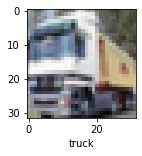

In [76]:
plot_sample(x_train, y_train,1)

**Normalize**

In [24]:
x_train = x_train/255
x_test = x_test/255

**Create ANN Models**

In [26]:
ann = models.Sequential([
    layers.Flatten(input_shape=[32,32,3]),
    layers.Dense(3000,activation="relu"), #Layers and Activation Functions
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])

ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=6)

Epoch 1/6
1563/1563 [==============================] - 63s 40ms/step - loss: 1.9309 - accuracy: 0.3036
Epoch 2/6
1563/1563 [==============================] - 90s 57ms/step - loss: 1.6404 - accuracy: 0.4204
Epoch 3/6
1563/1563 [==============================] - 63s 41ms/step - loss: 1.5601 - accuracy: 0.4541
Epoch 4/6
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4838 - accuracy: 0.4795
Epoch 5/6
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4378 - accuracy: 0.4922
Epoch 6/6
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3851 - accuracy: 0.5124


In [27]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 1.4235 - accuracy: 0.4944


[1.423522710800171, 0.4943999946117401]

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(x_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print("Classification Report :\n", classification_report(y_test,y_pred_class))

Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.49      0.54      1000
           1       0.64      0.58      0.61      1000
           2       0.39      0.40      0.39      1000
           3       0.36      0.35      0.35      1000
           4       0.41      0.45      0.43      1000
           5       0.44      0.34      0.39      1000
           6       0.60      0.43      0.50      1000
           7       0.60      0.53      0.57      1000
           8       0.45      0.79      0.58      1000
           9       0.54      0.58      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [40]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [41]:
cnn.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [42]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8450 - accuracy: 0.3076
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3335 - accuracy: 0.5203
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1823 - accuracy: 0.5833
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1050 - accuracy: 0.6071
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0247 - accuracy: 0.6394
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9703 - accuracy: 0.6589
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9290 - accuracy: 0.6750
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8846 - accuracy: 0.6884
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8551 - accuracy: 0.7019
Epoch 10/10
1563/1563 [==============================] - 29s 18m

In [43]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9523 - accuracy: 0.6655


[0.952273428440094, 0.6654999852180481]

In [57]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

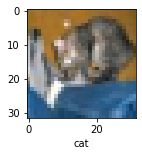

In [90]:
y_test = y_test.reshape(-1,)
plot_sample(x_test,y_test,0)